In [19]:
import pandas as pd
import seaborn as sns

In [20]:
path = "data/places.csv"
df = pd.read_csv(path, low_memory=False)

In [21]:
df.rename( columns= { "catr": "road_type", "voie": "road_num", "circ": "traffic_type", "nbv": "num_lanes", "vosp": "bike_lane_type",
                     "prof": "terrain_type", "plan": "curve_type", "pr1": "pr_distance", "lartpc": "central_width", "larrout": "width", "surf": "condition",
                      "infra": "infrastructure", "env1": "school"}, inplace=True)

In [22]:
df.count()

Num_Acc           839985
road_type         839984
road_num          780914
v1                332816
v2                 33953
traffic_type      839187
num_lanes         838195
pr                414770
pr_distance       413463
bike_lane_type    838345
terrain_type      838924
curve_type        838909
central_width     830440
width             831706
condition         838968
infrastructure    838707
situ              838983
school            838709
dtype: int64

In [23]:
df.head()

,Num_Acc,road_type,road_num,v1,v2,traffic_type,num_lanes,pr,pr_distance,bike_lane_type,terrain_type,curve_type,central_width,width,condition,infrastructure,situ,school
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


## Road Type

    1 - Highway

    2 - National Road

    3 - Departmental Road

    4 - Communal Way

    5 - Off public network

    6 - Parking lot open to public traffic

    9 - other


In [24]:
df['road_type'].value_counts()

road_type
4.0    425061
3.0    262690
2.0     67918
1.0     61077
9.0     16084
6.0      5520
5.0      1634
Name: count, dtype: int64

In [25]:
df['road_type'].isna().sum()

1

In [26]:
df['road_type'].fillna(9.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\2883975627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['road_type'].fillna(9.0, inplace=True)


## Road number

In [27]:
df['road_num'].value_counts()

road_num
0        451032
1         22224
6          8953
7          8055
4          7173
          ...  
00CR7         1
2913          1
00D75         1
00D18         1
1560          1
Name: count, Length: 1087, dtype: int64

In [28]:
df.drop('road_num', axis=1, inplace=True)

## V1

Route number numeric index (?)

In [29]:
df['v1'].value_counts()

v1
0.0    325698
2.0      3307
1.0      1020
3.0       768
6.0       461
4.0       396
7.0       392
9.0       295
8.0       247
5.0       232
Name: count, dtype: int64

In [30]:
df['v1'].isna().sum()

507169

In [31]:
df.drop('v1', axis=1, inplace=True)

## V2

Letter alphanumeric index of road

In [32]:
df['v2'].value_counts()

v2
A    20069
D     2200
N     1976
E     1942
B     1372
0     1091
C     1011
a      879
b      778
      537
F      263
e      213
S      177
G      140
1      134
R      114
L       99
2       92
P       77
J       71
H       70
3       70
M       63
K       52
Z       42
4       38
n       35
c       34
s       34
T       33
W       31
5       27
6       27
I       25
V       21
z       16
d       15
m       11
7       11
8       10
9        9
Y        7
O        7
Q        7
l        4
t        3
U        3
g        2
r        2
v        2
p        2
f        2
X        1
w        1
y        1
Name: count, dtype: int64

In [33]:
df['v2'].isna().sum()

806032

In [34]:
df.drop('v2', axis=1, inplace=True)

## Traffic type

    1 - One way

    2 - Bidirectional

    3 - Separated carriageways

    4 - With variable assignment channels


In [35]:
df['traffic_type'].value_counts()

traffic_type
2.0    532823
1.0    149375
3.0    107855
0.0     44556
4.0      4578
Name: count, dtype: int64

In [36]:
df['traffic_type'].isna().sum()

798

Filling missing values with the most common value

In [37]:
df['traffic_type'].fillna(2.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\3985756781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['traffic_type'].fillna(2.0, inplace=True)


## Number of lanes

In [38]:
df['traffic_type'].isna().sum()

0

<Axes: ylabel='Frequency'>

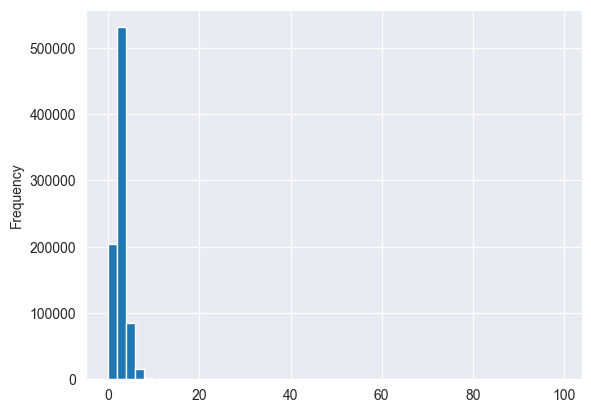

In [39]:
df['num_lanes'].plot(kind='hist', bins=50)

In [40]:
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2.0 if x > 10 else x)

In [41]:
df['num_lanes'].fillna(2.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\1068708797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_lanes'].fillna(2.0, inplace=True)


<Axes: ylabel='Frequency'>

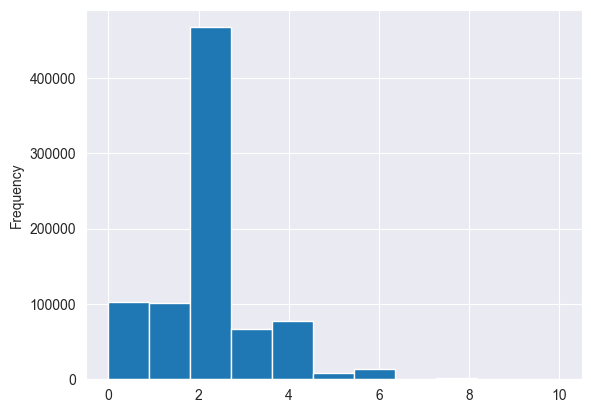

In [42]:
df['num_lanes'].plot(kind='hist', bins=11)

In [43]:
df['num_lanes'] = df['num_lanes'].apply(lambda x: 7.0 if x > 7.0 else x)

## Bike lane

    1 - Bike path

    2 - Cycle Bank

    3 - Reserved channel


In [44]:
df['bike_lane_type'].value_counts()

bike_lane_type
0.0    787021
3.0     23473
1.0     16570
2.0     11281
Name: count, dtype: int64

In [45]:
df['bike_lane_type'].isna().sum()

1640

In [46]:
df['bike_lane_type'].fillna(0.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\547755816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bike_lane_type'].fillna(0.0, inplace=True)


## Terrain

    1 - Dish

    2 - Slope

    3 - Hilltop

    4- Hill bottom



In [47]:
df['terrain_type'].value_counts()

terrain_type
1.0    634776
2.0    114043
0.0     63894
3.0     15130
4.0     11081
Name: count, dtype: int64

In [48]:
df['terrain_type'].isna().sum()

1061

In [49]:
df['terrain_type'].fillna(1.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\95427357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['terrain_type'].fillna(1.0, inplace=True)


## PR number (?)

In [50]:
df['pr'].value_counts()

pr
0.0       129543
1.0        29888
2.0        14437
3.0        11661
4.0         9761
           ...  
474.0          1
475.0          1
4000.0         1
2600.0         1
1125.0         1
Name: count, Length: 736, dtype: int64

In [51]:
df['pr'].isna().sum()

425215

In [52]:
df.drop('pr', axis=1, inplace=True)

## PR distance (?)

In [53]:
df['pr_distance'].value_counts()

pr_distance
0.0       173181
500.0      25276
200.0      15199
800.0      14751
100.0      13998
           ...  
2101.0         1
1465.0         1
1278.0         1
1659.0         1
3437.0         1
Name: count, Length: 2127, dtype: int64

In [54]:
df['pr_distance'].isna().sum()

426522

In [55]:
df.drop('pr_distance', axis=1, inplace=True)

## Road curve

    1 - Straight part

    2 - Curved on the left

    3 - Curved right

    4 - In "S"


In [56]:
df['curve_type'].value_counts()

curve_type
1.0    639903
2.0     68483
3.0     61946
0.0     57847
4.0     10730
Name: count, dtype: int64

In [57]:
df['curve_type'].isna().sum()

1076

In [58]:
df['curve_type'].fillna(1.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\1026207524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['curve_type'].fillna(1.0, inplace=True)


## Central width

In [59]:
df['central_width'].value_counts()

central_width
0.0      699686
15.0      30770
10.0      18085
20.0      15641
30.0       7863
          ...  
206.0         1
446.0         1
915.0         1
950.0         1
625.0         1
Name: count, Length: 371, dtype: int64

In [60]:
df['central_width'].isna().sum()

9545

<Axes: ylabel='Frequency'>

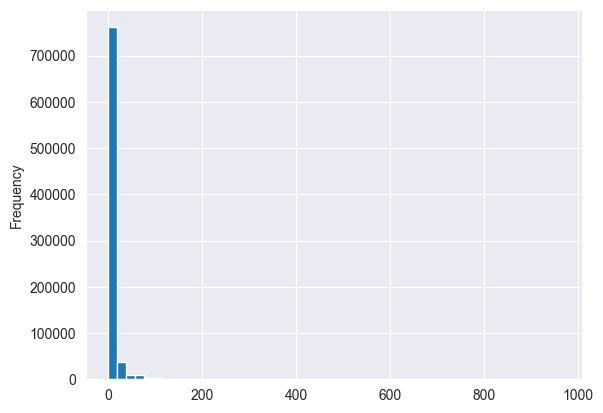

In [61]:
df['central_width'].plot(kind='hist', bins=50)

In [62]:
df.drop('central_width', axis=1, inplace=True)

## Width

In [63]:
df['width'].min()

-81.0

In [64]:
df['width'].max()

999.0

In [65]:
df['width'].isna().sum()

8279

In [66]:
df.drop('width', axis=1, inplace=True)

## Road condition

    1 - normal

    2 - wet

    3 - puddles

    4 - flooded

    5 - snow

    6 - mud

    7 - icy

    8 - fat - oil

    9 - other


In [67]:
df['condition'].value_counts()

condition
1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: count, dtype: int64

In [68]:
df['condition'].isna().sum()

1017

In [69]:
df['condition'].fillna(1.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\1682321041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna(1.0, inplace=True)


## Infrastructure

    1 - Underground - tunnel

    2 - Bridge - autopont

    3 - Exchanger or connection brace

    4 - Railway

    5 - Carrefour arranged

    6 - Pedestrian area

    7 - Toll zone


In [70]:
df['infrastructure'].value_counts()

infrastructure
0.0    747965
5.0     50330
3.0     12853
2.0     11720
1.0      6994
6.0      5299
4.0      3034
7.0       512
Name: count, dtype: int64

In [71]:
df['infrastructure'].isna().sum()

1278

In [72]:
df['infrastructure'].fillna(0.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\1528216239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['infrastructure'].fillna(0.0, inplace=True)


## Accident situation

    1 - On the road

    2 - On emergency stop band

    3 - On the verge

    4 - On the sidewalk

    5 - On bike path


In [73]:
df['situ'].value_counts()

situ
1.0    722069
3.0     48818
0.0     43291
4.0     14493
2.0      5191
5.0      5121
Name: count, dtype: int64

In [74]:
df['situ'].isna().sum()

1002

In [75]:
df['situ'].fillna(0.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\1196960274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['situ'].fillna(0.0, inplace=True)


## Near school (?)

In [76]:
df['school'].value_counts()

school
0.0     477933
99.0    319986
3.0      40790
Name: count, dtype: int64

In [77]:
df['school'].isna().sum()

1276

In [78]:
df['school'].fillna(0.0, inplace=True)

C:\Users\annag\AppData\Local\Temp\ipykernel_19752\758153558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['school'].fillna(0.0, inplace=True)


In [79]:
df['school'] = df['school'].apply(lambda x: 2.0 if x==99.0 else x/3.0)

# Notes

## Problem points

* The meaning of the **PR** field (and by associatoin the **PR distance** field) and the **near school** field is not clear from neither the description nor the actual values present in the data. A lot of rows are also missing these, it might be best to ignore these fields.

* **Road number** and **V1** and **V2** most probably somehow correspond to the french road numbering system, but there are a large number of options and the meanings are not clear cut an there are a large number of missing rows for the latter two.

* Completely unrealistic values pop up in the **number of lanes**.

* **Width** and **central width** coloumn meanings are not exactly known.

## Categorical data

* There are a large number of columns which contain categorical data, these seem to be well generalizable via dummy columns.

In [80]:
df.head()

,Num_Acc,road_type,traffic_type,num_lanes,bike_lane_type,terrain_type,curve_type,condition,infrastructure,situ,school
0,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,2.0
3,201600000004,4.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
4,201600000005,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


<Axes: >

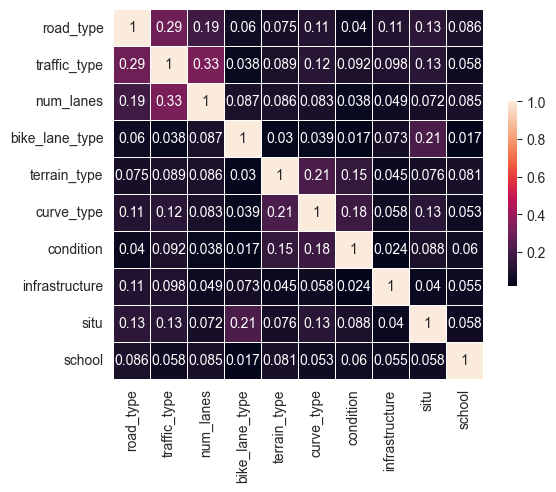

In [81]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats.contingency import association

def cramersv(a, b):
    return association(contingency_matrix(a, b))

corr = df.drop('Num_Acc', axis=1).corr(method=cramersv)
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [82]:
df.to_csv('places_prepped.csv', index=False)